<a href="https://colab.research.google.com/github/golammostafa13/hate_speech_detection/blob/main/English_Machine_and_Deep_learning_Models(combined_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import numpy as np 
import pandas as pd 
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from keras.preprocessing.sequence import pad_sequences
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import string as st
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

,Unnamed: 0,label,tweet
0,0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
file = '/content/drive/MyDrive/Paper Writing/cleaned_data.csv'
data = pd.read_csv(file, encoding='latin-1')

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
df['tweet']=df['tweet'].apply(clean_text)

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]
df['tokens'] = df['tweet'].apply(lambda msg : tokenize(msg))
df.head()

,Unnamed: 0,label,tweet,tokens
0,0,0,rt mayasolov woman shouldnt complain clean ho...,"[, rt, mayasolov, woman, shouldnt, complain, c..."
1,1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"[, rt, boy, dat, coldtyga, dwn, bad, cuffin, d..."
2,2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,"[, rt, urkindofbrand, dawg, rt, ever, fuck, bi..."
3,3,1,rt cganderson vivabas look like tranni,"[, rt, cganderson, vivabas, look, like, tranni]"
4,4,1,rt shenikarobert shit hear might true might f...,"[, rt, shenikarobert, shit, hear, might, true,..."


In [ ]:
def remove_small_words(text):
    return [x for x in text if len(x) > 2 ]
df['tokens'] = df['tokens'].apply(lambda x : remove_small_words(x))
df.head()

,Unnamed: 0,label,tweet,tokens
0,0,0,rt mayasolov woman shouldnt complain clean ho...,"[mayasolov, woman, shouldnt, complain, clean, ..."
1,1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho..."
2,2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,"[urkindofbrand, dawg, ever, fuck, bitch, start..."
3,3,1,rt cganderson vivabas look like tranni,"[cganderson, vivabas, look, like, tranni]"
4,4,1,rt shenikarobert shit hear might true might f...,"[shenikarobert, shit, hear, might, true, might..."


In [ ]:
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]
df['tokens'] = df['tokens'].apply(lambda x : remove_stopwords(x))
df.head()

,Unnamed: 0,label,tweet,tokens
0,0,0,rt mayasolov woman shouldnt complain clean ho...,"[mayasolov, woman, shouldnt, complain, clean, ..."
1,1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho..."
2,2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,"[urkindofbrand, dawg, ever, fuck, bitch, start..."
3,3,1,rt cganderson vivabas look like tranni,"[cganderson, vivabas, look, like, tranni]"
4,4,1,rt shenikarobert shit hear might true might f...,"[shenikarobert, shit, hear, might, true, might..."


In [ ]:
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]
df['tokens'] = df['tokens'].apply(lambda wrd: stemming(wrd))
df.head()

,Unnamed: 0,label,tweet,tokens
0,0,0,rt mayasolov woman shouldnt complain clean ho...,"[mayasolov, woman, shouldnt, complain, clean, ..."
1,1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho..."
2,2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,"[urkindofbrand, dawg, ever, fuck, bitch, start..."
3,3,1,rt cganderson vivabas look like tranni,"[cganderson, vivaba, look, like, tranni]"
4,4,1,rt shenikarobert shit hear might true might f...,"[shenikarobert, shit, hear, might, true, might..."


In [ ]:
from nltk import WordNetLemmatizer
nltk.download('wordnet')
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
df['tokens'] = df['tokens'].apply(lambda x : lemmatize(x))
df.head()

[nltk_data] Downloading package wordnet to /home/mostafa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,label,tweet,tokens
0,0,0,rt mayasolov woman shouldnt complain clean ho...,"[mayasolov, woman, shouldnt, complain, clean, ..."
1,1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho..."
2,2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,"[urkindofbrand, dawg, ever, fuck, bitch, start..."
3,3,1,rt cganderson vivabas look like tranni,"[cganderson, vivaba, look, like, tranni]"
4,4,1,rt shenikarobert shit hear might true might f...,"[shenikarobert, shit, hear, might, true, might..."


In [ ]:
def return_sentences(tokens):
    return " ".join([word for word in tokens])
df['clean_text'] = df['tokens'].apply(lambda x : return_sentences(x))
df.head()

,Unnamed: 0,label,tweet,tokens,clean_text
0,0,0,rt mayasolov woman shouldnt complain clean ho...,"[mayasolov, woman, shouldnt, complain, clean, ...",mayasolov woman shouldnt complain clean hou am...
1,1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,"[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...",boy dat coldtyga dwn bad cuffin dat hoe place
2,2,1,rt urkindofbrand dawg rt ever fuck bitch sta...,"[urkindofbrand, dawg, ever, fuck, bitch, start...",urkindofbrand dawg ever fuck bitch start cri c...
3,3,1,rt cganderson vivabas look like tranni,"[cganderson, vivaba, look, like, tranni]",cganderson vivaba look like tranni
4,4,1,rt shenikarobert shit hear might true might f...,"[shenikarobert, shit, hear, might, true, might...",shenikarobert shit hear might true might faker...


# Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'],random_state = 42,test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39652,), (9914,), (39652,), (9914,))

# Machine Learning Models

In [ ]:
Tfidf_vect = TfidfVectorizer(max_features=4000)
Tfidf_vect.fit(df['clean_text'])
Train_X_Tfidf = Tfidf_vect.transform(X_train)
Test_X_Tfidf = Tfidf_vect.transform(X_test)

# Naive Bayes

In [ ]:
model = MultinomialNB()
model.fit(Train_X_Tfidf,y_train)
from sklearn.metrics import accuracy_score

predictions_train_NB = model.predict(Train_X_Tfidf)
predictions_NB = model.predict(Test_X_Tfidf)
print("Naive Bayes Training Accuracy Score -> ",accuracy_score(predictions_train_NB, y_train)*100)
print("Naive Bayes Test Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Training Accuracy Score ->  91.60950267325734
Naive Bayes Test Accuracy Score ->  90.64958644341336


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions_NB))
print(confusion_matrix(y_test,predictions_NB))

              precision    recall  f1-score   support

           0       0.92      0.49      0.64      1673
           1       0.91      0.99      0.95      8241

    accuracy                           0.91      9914
   macro avg       0.91      0.74      0.79      9914
weighted avg       0.91      0.91      0.89      9914

[[ 817  856]
 [  71 8170]]


# **cross-validation NB**

In [ ]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
k = 10
kf = KFold(n_splits=k, random_state=None)
result = cross_val_score(model , Train_X_Tfidf, y_train, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9050992897383114


# **SVM**

In [ ]:
from sklearn import svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
pred_y_train = SVM.predict(Train_X_Tfidf)
pred_y = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("SVM Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

SVM Train Accuracy Score ->  97.36709371532332
SVM Test Accuracy Score ->  96.16703651402058


In [ ]:
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1673
           1       0.98      0.98      0.98      8241

    accuracy                           0.96      9914
   macro avg       0.93      0.93      0.93      9914
weighted avg       0.96      0.96      0.96      9914

[[1483  190]
 [ 190 8051]]


# **cross-validation with SVM**

In [ ]:
result = cross_val_score(SVM , Train_X_Tfidf, y_train, cv = kf)

print("Avg accuracy: {}".format(result.max()))

Avg accuracy: 0.9649432534678436


In [ ]:
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9605821169728316


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(Train_X_Tfidf,y_train)
pred_y_train = RF.predict(Train_X_Tfidf)
pred_y = RF.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

Train Accuracy Score ->  99.7730253202865
Test Accuracy Score ->  98.56768206576558


In [ ]:
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1673
           1       0.99      0.99      0.99      8241

    accuracy                           0.99      9914
   macro avg       0.98      0.97      0.97      9914
weighted avg       0.99      0.99      0.99      9914

[[1589   84]
 [  58 8183]]


# **cross-validation with RF**

In [ ]:
result = cross_val_score(RF , Train_X_Tfidf, y_train, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9830021322476867


# **DT**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf = clf.fit(Train_X_Tfidf,y_train)

pred_y_train = clf.predict(Train_X_Tfidf)
pred_y = clf.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Train Accuracy Score -> ",accuracy_score(pred_y_train, y_train)*100)
print("Test Accuracy Score -> ",accuracy_score(pred_y, y_test)*100)

Train Accuracy Score ->  99.7730253202865
Test Accuracy Score ->  98.52733508170263


In [ ]:
print(classification_report(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1673
           1       0.99      0.99      0.99      8241

    accuracy                           0.99      9914
   macro avg       0.98      0.97      0.97      9914
weighted avg       0.99      0.99      0.99      9914

[[1585   88]
 [  58 8183]]


# **cross-validation with DT**

In [ ]:
result = cross_val_score(clf , Train_X_Tfidf, y_train, cv = kf)

print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.9811358654490026


# **WordCloud**

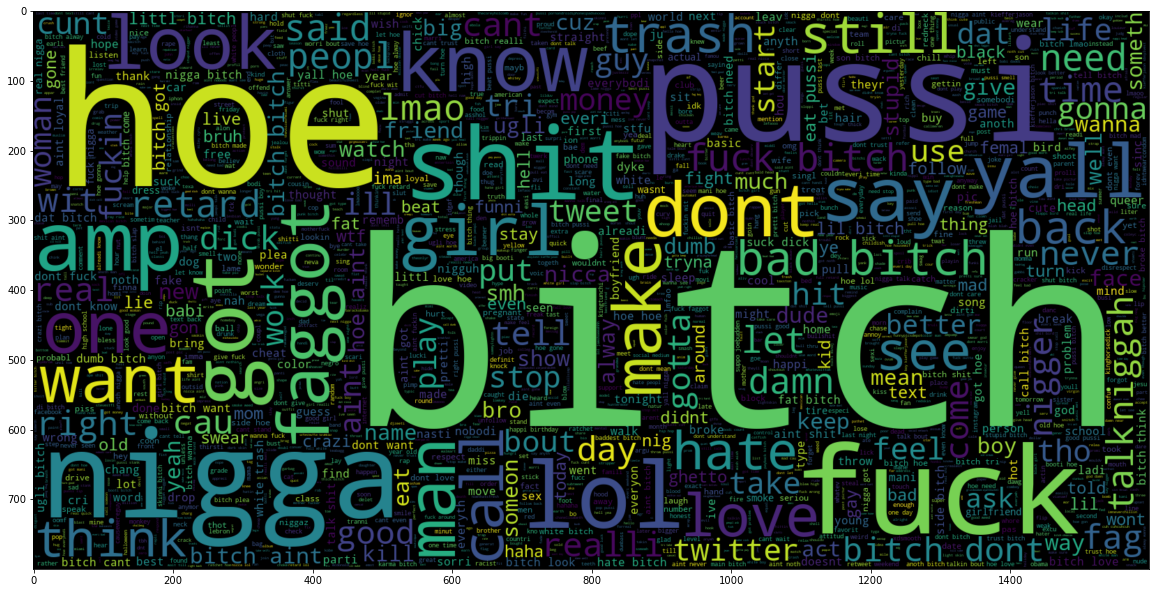

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 1].clean_text))
plt.imshow(wc , interpolation = 'bilinear')

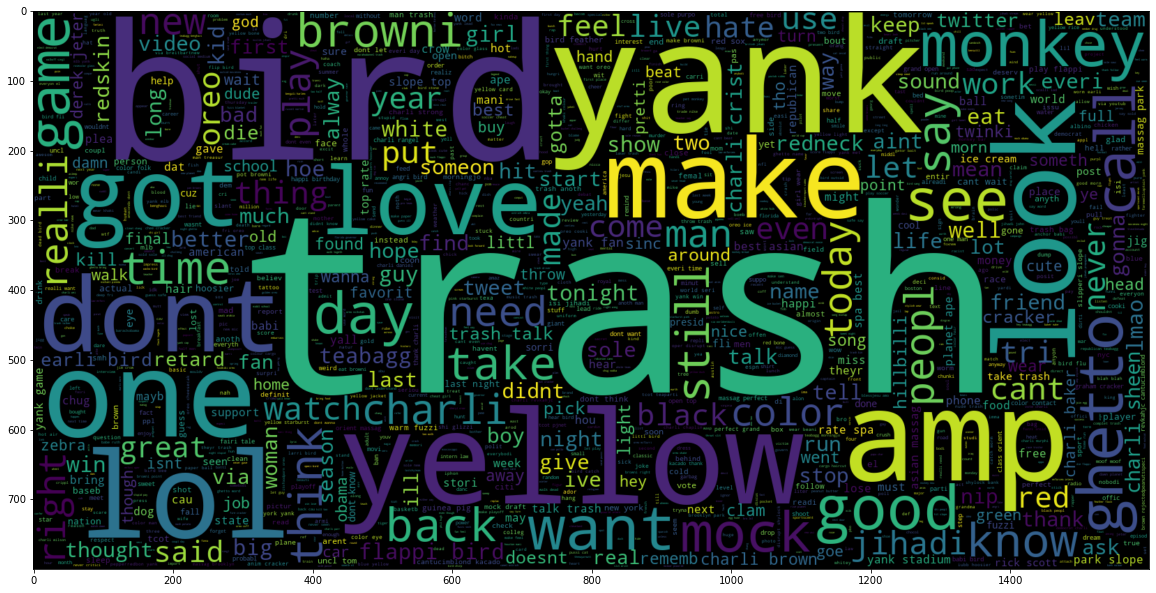

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.label == 0].clean_text))
plt.imshow(wc , interpolation = 'bilinear')

# **Tokenize**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 24579


# **Padding**

In [ ]:
MAX_SEQUENCE_LENGTH = 60

from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(X_train),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (39652, 60)
Testing X Shape: (9914, 60)


# **Target Data Reshape**

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
print(y_train.shape, y_test.shape)

(39652, 1) (9914, 1)


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train, y_train,test_size=0.2, random_state = 0)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

# **Word2Vec Model create**

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))
print(Word2vec_train_data[5])

['attent', 'one', 'motorobo', 'knee', 'someon', 'get', 'jiggaboo', 'water', 'thirsti']


In [ ]:
Embedding_dimensions = 200
from gensim.models import Word2Vec
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=3,
                 min_count=4)

In [ ]:
word2vec_model.save('word2vec_model.model')

NameError: name 'word2vec_model' is not defined

In [ ]:
from gensim.models import Word2Vec
word2vec_model = Word2Vec.load('word2vec_model.model')

# **Fast-Text model create**

In [ ]:
fastText_train_data = list(map(lambda x: x.split(), X_train))
print(fastText_train_data[5])

['attent', 'one', 'motorobo', 'knee', 'someon', 'get', 'jiggaboo', 'water', 'thirsti']


In [ ]:
Embedding_dimensions = 200
from gensim.models import FastText
fastText_model = FastText(fastText_train_data,
                 vector_size=Embedding_dimensions,
                 workers=3,
                 min_count=4)

In [ ]:
fastText_model.save('fastText_model.model')

In [ ]:
from gensim.models import FastText
fastText_model = FastText.load('fastText_model.model')

# **Embedding Matrix**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout, GRU
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [ ]:
Embedding_dimensions = 200
embedding_matrix = np.zeros((vocab_size, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (24579, 200)


# **Embedding Layer**

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          Embedding_dimensions,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
def print_result(model, history, x_test, y_test, name):
    model_path = "/content/drive/MyDrive/Paper Writing/modelsEnglish/"+ name+ " model"
    
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history) 

    # save to json:  
    hist_json_file = "/content/drive/MyDrive/Paper Writing/HistoryEnglish/" + name + 'history.json' 
    with open(hist_json_file, mode='w') as f:
        hist_df.to_json(f)
            
    #save model
    model.save(model_path)
    
    
    #ploting training  history
    accr = model.evaluate(x_test,y_test)
    print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

    y_pred = model.predict(x_test)

    #normalize
    y_pred_frac=np.argmax(y_pred, axis=1)
    y_test_frac=np.argmax(y_test, axis=1)

    print("-------------Classification Report----------------")
    print(classification_report(y_test_frac, y_pred_frac))
    print("-------------------//*//-------------------------")

    print("-------------Confusion Matrix----------------")
    cm = confusion_matrix(y_test_frac, y_pred_frac)
    print(cm)
    print("-------------------//*//-------------------------")
  

In [ ]:
from keras.layers import Layer
from keras import backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
# , X_train_word, y_train_word, x_test, y_test, x_val, y_val
def train_model(model):
    epochs = 10
    batch_size = 64
    #callbacks = [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(X_val, y_val))
    # history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return history, model

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          Embedding_dimensions,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
model.add(embedding_sequences)
model.add(Conv1D(128, 5, activation='relu'))
model.add(Bidirectional(LSTM(units=128, return_sequences = True, dropout=0.2,recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(units=128, return_sequences = True, dropout=0.2,recurrent_dropout=0.2)))
model.add(attention())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print('summary of the built model..')
model.summary()

In [ ]:
history, model = train_model(model)

In [ ]:
print_result(model, history, X_test, y_test, 'Conv_Bi-LSTM_Bi-LSTM_att')

# **CNN-Bi_GRU**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 200)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 56, 64)            64064     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               33024 

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 128s 369ms/step - loss: 0.1955 - accuracy: 0.9090 - f1_m: 0.9453 - precision_m: 0.9415 - recall_m: 0.9504 - val_loss: 0.1916 - val_accuracy: 0.9067 - val_f1_m: 0.9414 - val_precision_m: 0.9772 - val_recall_m: 0.9087
Epoch 2/30
310/310 [==============================] - 115s 372ms/step - loss: 0.1717 - accuracy: 0.9212 - f1_m: 0.9525 - precision_m: 0.9521 - recall_m: 0.9537 - val_loss: 0.1587 - val_accuracy: 0.9306 - val_f1_m: 0.9575 - val_precision_m: 0.9695 - val_recall_m: 0.9462
Epoch 3/30
310/310 [==============================] - 110s 354ms/step - loss: 0.1584 - accuracy: 0.9285 - f1_m: 0.9567 - precision_m: 0.9599 - recall_m: 0.9541 - val_loss: 0.1484 - val_accuracy: 0.9330 - val_f1_m: 0.9596 - val_precision_m: 0.9568 - val_recall_m: 0.9628
Epoch 4/30
310/310 [==============================] - 111s 359ms/step - loss: 0.1547 - accuracy: 0.9324 - f1_m: 0.9590 - precision_m: 0.9638 - recall_m: 0.9548 - val_loss: 0.1474 - val_accur

In [ ]:
model.save("CBiGRU.h5")

In [ ]:
np.save('historyCBG.npy',history.history)
#history=np.load('my_history.npy',allow_pickle='TRUE').item()

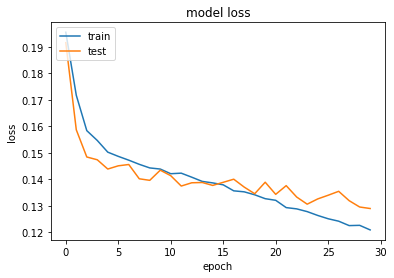

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

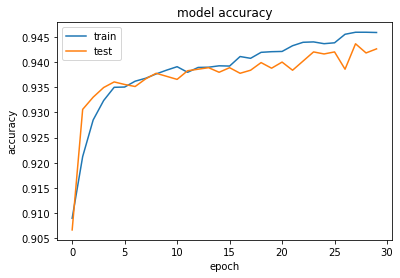

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN-Bi_LSTM**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 124s 357ms/step - loss: 0.2260 - accuracy: 0.8983 - f1_m: 0.9397 - precision_m: 0.9286 - recall_m: 0.9533 - val_loss: 0.1839 - val_accuracy: 0.9165 - val_f1_m: 0.9493 - val_precision_m: 0.9514 - val_recall_m: 0.9478
Epoch 2/30
310/310 [==============================] - 127s 409ms/step - loss: 0.1773 - accuracy: 0.9198 - f1_m: 0.9517 - precision_m: 0.9500 - recall_m: 0.9544 - val_loss: 0.1583 - val_accuracy: 0.9309 - val_f1_m: 0.9583 - val_precision_m: 0.9575 - val_recall_m: 0.9596
Epoch 3/30
310/310 [==============================] - 135s 435ms/step - loss: 0.1647 - accuracy: 0.9261 - f1_m: 0.9553 - precision_m: 0.9577 - recall_m: 0.9537 - val_loss: 0.1530 - val_accuracy: 0.9310 - val_f1_m: 0.9583 - val_precision_m: 0.9599 - val_recall_m: 0.9571
Epoch 4/30
310/310 [==============================] - 143s 462ms/step - loss: 0.1586 - accuracy: 0.9295 - f1_m: 0.9573 - precision_m: 0.9596 - recall_m: 0.9558 - val_loss: 0.1539 - val_accur

In [ ]:
model.save('CBiLSTM.h5')
np.save('historyCBL.npy',history.history)

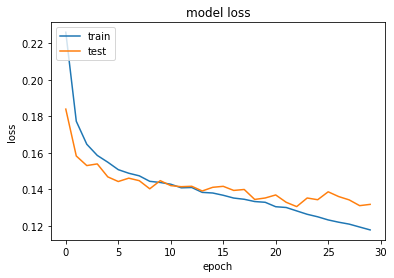

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

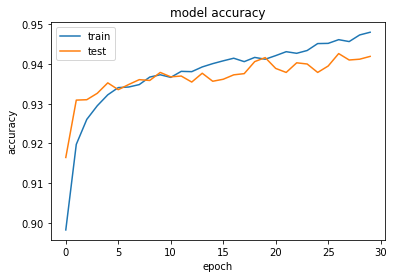

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN-LSTM**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 83s 248ms/step - loss: 0.2323 - accuracy: 0.8942 - f1_m: 0.9359 - precision_m: 0.9223 - recall_m: 0.9523 - val_loss: 0.1800 - val_accuracy: 0.9159 - val_f1_m: 0.9498 - val_precision_m: 0.9403 - val_recall_m: 0.9599
Epoch 2/30
310/310 [==============================] - 75s 242ms/step - loss: 0.1812 - accuracy: 0.9163 - f1_m: 0.9497 - precision_m: 0.9469 - recall_m: 0.9535 - val_loss: 0.1572 - val_accuracy: 0.9312 - val_f1_m: 0.9582 - val_precision_m: 0.9654 - val_recall_m: 0.9515
Epoch 3/30
310/310 [==============================] - 76s 245ms/step - loss: 0.1686 - accuracy: 0.9258 - f1_m: 0.9553 - precision_m: 0.9548 - recall_m: 0.9565 - val_loss: 0.1551 - val_accuracy: 0.9315 - val_f1_m: 0.9584 - val_precision_m: 0.9650 - val_recall_m: 0.9523
Epoch 4/30
310/310 [==============================] - 76s 244ms/step - loss: 0.1619 - accuracy: 0.9271 - f1_m: 0.9558 - precision_m: 0.9581 - recall_m: 0.9544 - val_loss: 0.1484 - val_accuracy:

In [ ]:
model.save('CLSTM.h5')
np.save('historyCBL.npy',history.history)

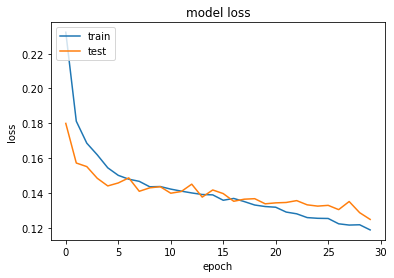

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

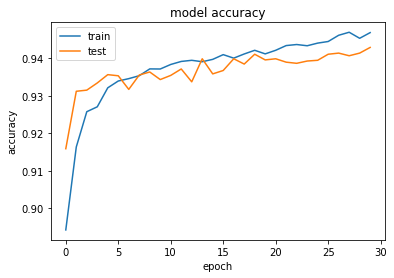

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **LSTM**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 64)                67840     
                                                                 
 dense_9 (Dense)             (None, 256)               16640     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                           

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 200s 351ms/step - loss: 0.2275 - accuracy: 0.8980 - f1_m: 0.9395 - precision_m: 0.9276 - recall_m: 0.9540 - val_loss: 0.1914 - val_accuracy: 0.9080 - val_f1_m: 0.9461 - val_precision_m: 0.9208 - val_recall_m: 0.9734
Epoch 2/30
310/310 [==============================] - 85s 273ms/step - loss: 0.1863 - accuracy: 0.9123 - f1_m: 0.9472 - precision_m: 0.9447 - recall_m: 0.9507 - val_loss: 0.1741 - val_accuracy: 0.9199 - val_f1_m: 0.9508 - val_precision_m: 0.9675 - val_recall_m: 0.9353
Epoch 3/30
310/310 [==============================] - 83s 268ms/step - loss: 0.1778 - accuracy: 0.9174 - f1_m: 0.9502 - precision_m: 0.9500 - recall_m: 0.9512 - val_loss: 0.1612 - val_accuracy: 0.9293 - val_f1_m: 0.9574 - val_precision_m: 0.9544 - val_recall_m: 0.9608
Epoch 4/30
310/310 [==============================] - 78s 252ms/step - loss: 0.1711 - accuracy: 0.9234 - f1_m: 0.9538 - precision_m: 0.9538 - recall_m: 0.9545 - val_loss: 0.1593 - val_accuracy

In [ ]:
model.save('LSTM.h5')
np.save('historyL.npy',history.history)

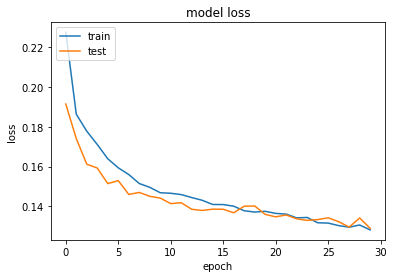

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

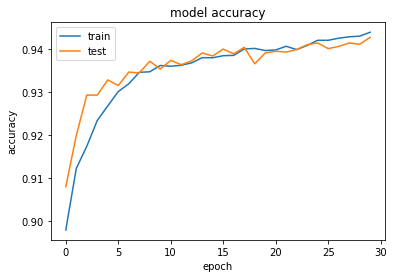

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Embedding Matrix with FastText**

In [ ]:
Embedding_dimensions = 200
embedding_matrix = np.zeros((vocab_size, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if fastText_model.wv.__contains__(word):
        embedding_matrix[token] = fastText_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (24579, 200)


In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          Embedding_dimensions,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

# **CNN-Bi_GRU(FT)**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(GRU(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d (SpatialD  (None, 60, 200)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 56, 64)            64064     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49920     
 l)                                                              
                                                                 
 dense (Dense)               (None, 256)               33024 

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 94s 268ms/step - loss: 0.2692 - accuracy: 0.8785 - f1_m: 0.9282 - precision_m: 0.9124 - recall_m: 0.9480 - val_loss: 0.2032 - val_accuracy: 0.9058 - val_f1_m: 0.9425 - val_precision_m: 0.9519 - val_recall_m: 0.9339
Epoch 2/30
310/310 [==============================] - 82s 264ms/step - loss: 0.2011 - accuracy: 0.9034 - f1_m: 0.9416 - precision_m: 0.9448 - recall_m: 0.9397 - val_loss: 0.1980 - val_accuracy: 0.9037 - val_f1_m: 0.9392 - val_precision_m: 0.9804 - val_recall_m: 0.9018
Epoch 3/30
310/310 [==============================] - 85s 275ms/step - loss: 0.1836 - accuracy: 0.9132 - f1_m: 0.9472 - precision_m: 0.9558 - recall_m: 0.9398 - val_loss: 0.1856 - val_accuracy: 0.9108 - val_f1_m: 0.9444 - val_precision_m: 0.9758 - val_recall_m: 0.9154
Epoch 4/30
310/310 [==============================] - 121s 391ms/step - loss: 0.1754 - accuracy: 0.9181 - f1_m: 0.9501 - precision_m: 0.9593 - recall_m: 0.9419 - val_loss: 0.1719 - val_accuracy

In [ ]:
model.save('CBGRUF.h5')
np.save('historyCBGRUF.npy',history.history)

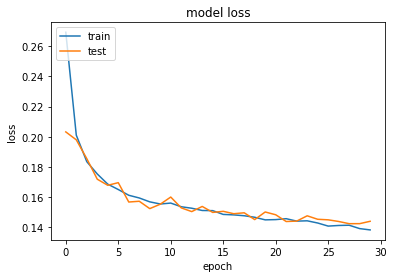

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

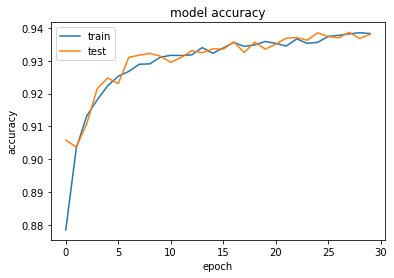

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN-Bi_LSTM(FT)**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 56, 64)            64064     
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 256)               3302

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 105s 305ms/step - loss: 0.2801 - accuracy: 0.8766 - f1_m: 0.9268 - precision_m: 0.9105 - recall_m: 0.9483 - val_loss: 0.2278 - val_accuracy: 0.8991 - val_f1_m: 0.9380 - val_precision_m: 0.9514 - val_recall_m: 0.9255
Epoch 2/30
310/310 [==============================] - 93s 300ms/step - loss: 0.2112 - accuracy: 0.8993 - f1_m: 0.9392 - precision_m: 0.9415 - recall_m: 0.9380 - val_loss: 0.1988 - val_accuracy: 0.9059 - val_f1_m: 0.9449 - val_precision_m: 0.9199 - val_recall_m: 0.9718
Epoch 3/30
310/310 [==============================] - 93s 300ms/step - loss: 0.1931 - accuracy: 0.9077 - f1_m: 0.9440 - precision_m: 0.9502 - recall_m: 0.9389 - val_loss: 0.1788 - val_accuracy: 0.9164 - val_f1_m: 0.9486 - val_precision_m: 0.9681 - val_recall_m: 0.9302
Epoch 4/30
310/310 [==============================] - 93s 301ms/step - loss: 0.1860 - accuracy: 0.9098 - f1_m: 0.9452 - precision_m: 0.9536 - recall_m: 0.9379 - val_loss: 0.1760 - val_accuracy

In [ ]:
model.save('CBLSTMF.h5')
np.save('historyCLSTMF.npy',history.history)

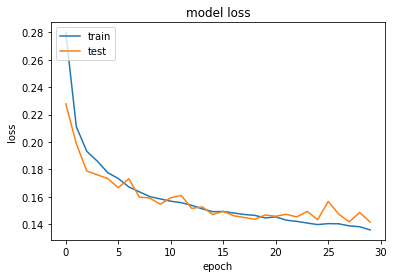

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

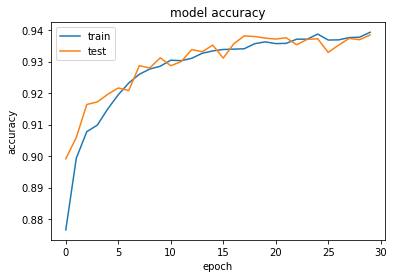

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN-Bi_LSTM(FT) Drop=0.5**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.5, recurrent_dropout=0.2))(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_2 (Conv1D)           (None, 56, 64)            64064     
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 256)               3302

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 165s 386ms/step - loss: 0.2846 - accuracy: 0.8736 - f1_m: 0.9262 - precision_m: 0.9028 - recall_m: 0.9537 - val_loss: 0.2172 - val_accuracy: 0.9023 - val_f1_m: 0.9408 - val_precision_m: 0.9455 - val_recall_m: 0.9367
Epoch 2/30
310/310 [==============================] - 116s 373ms/step - loss: 0.2164 - accuracy: 0.8982 - f1_m: 0.9387 - precision_m: 0.9382 - recall_m: 0.9406 - val_loss: 0.1988 - val_accuracy: 0.9041 - val_f1_m: 0.9411 - val_precision_m: 0.9573 - val_recall_m: 0.9259
Epoch 3/30
310/310 [==============================] - 138s 446ms/step - loss: 0.2019 - accuracy: 0.9044 - f1_m: 0.9422 - precision_m: 0.9450 - recall_m: 0.9408 - val_loss: 0.1837 - val_accuracy: 0.9168 - val_f1_m: 0.9491 - val_precision_m: 0.9631 - val_recall_m: 0.9358
Epoch 4/30
310/310 [==============================] - 145s 468ms/step - loss: 0.1908 - accuracy: 0.9076 - f1_m: 0.9438 - precision_m: 0.9529 - recall_m: 0.9357 - val_loss: 0.1724 - val_accur

# **Custom Attention Class create**

In [ ]:
from keras.layers import Layer

In [ ]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
#         print(input_shape[-1])
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        print(output.shape)
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

# **LSTM-Attention(FT) Drop=0.5**

In [ ]:
att_in=LSTM(64, dropout=0.5,return_sequences=True, recurrent_dropout=0.2)(embedding_sequences)
att_out=attention()(att_in)
outputs = Dense(1, activation='sigmoid')(att_out)
model = tf.keras.Model(sequence_input, outputs)
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 lstm_36 (LSTM)              (None, 60, 64)            67840     
                                                                 
 attention_33 (attention)    (None, 64)                124       
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,983,829
Trainable params: 68,029
Non-trainable params: 4,915,800
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 105s 312ms/step - loss: 0.3722 - accuracy: 0.8477 - f1_m: 0.9150 - precision_m: 0.8543 - recall_m: 0.9868 - val_loss: 0.2765 - val_accuracy: 0.8797 - val_f1_m: 0.9303 - val_precision_m: 0.8960 - val_recall_m: 0.9681
Epoch 2/30
310/310 [==============================] - 105s 340ms/step - loss: 0.2514 - accuracy: 0.8839 - f1_m: 0.9322 - precision_m: 0.9030 - recall_m: 0.9643 - val_loss: 0.2292 - val_accuracy: 0.8930 - val_f1_m: 0.9378 - val_precision_m: 0.9059 - val_recall_m: 0.9727
Epoch 3/30
310/310 [==============================] - 105s 338ms/step - loss: 0.2196 - accuracy: 0.8991 - f1_m: 0.9404 - precision_m: 0.9218 - recall_m: 0.9606 - val_loss: 0.2083 - val_accuracy: 0.9031 - val_f1_m: 0.9433 - val_precision_m: 0.9154 - val_recall_m: 0.9735
Epoch 4/30
310/310 [==============================] - 83s 266ms/step - loss: 0.2017 - accuracy: 0.9075 - f1_m: 0.9450 - precision_m: 0.9330 - recall_m: 0.9580 - val_loss: 0.1977 - val_accura

# **Embedding Matrix and Layer W2V Again load**

In [ ]:
Embedding_dimensions = 200
embedding_matrix = np.zeros((vocab_size, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (24579, 200)


In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          Embedding_dimensions,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

# **LSTM_Attention**

In [ ]:
att_in=LSTM(64, dropout=0.2,return_sequences=True, recurrent_dropout=0.2)(embedding_sequences)
att_out=attention()(att_in)
outputs = Dense(1, activation='sigmoid')(att_out)
model = tf.keras.Model(sequence_input, outputs)
model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 lstm_37 (LSTM)              (None, 60, 64)            67840     
                                                                 
 attention_34 (attention)    (None, 64)                124       
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,983,829
Trainable params: 68,029
Non-trainable params: 4,915,800
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 79s 237ms/step - loss: 0.3721 - accuracy: 0.8415 - f1_m: 0.9112 - precision_m: 0.8468 - recall_m: 0.9901 - val_loss: 0.2706 - val_accuracy: 0.8744 - val_f1_m: 0.9277 - val_precision_m: 0.8887 - val_recall_m: 0.9711
Epoch 2/30
310/310 [==============================] - 73s 236ms/step - loss: 0.2393 - accuracy: 0.8883 - f1_m: 0.9346 - precision_m: 0.9087 - recall_m: 0.9630 - val_loss: 0.2182 - val_accuracy: 0.8988 - val_f1_m: 0.9408 - val_precision_m: 0.9159 - val_recall_m: 0.9676
Epoch 3/30
310/310 [==============================] - 73s 235ms/step - loss: 0.2080 - accuracy: 0.9038 - f1_m: 0.9429 - precision_m: 0.9286 - recall_m: 0.9587 - val_loss: 0.2020 - val_accuracy: 0.9132 - val_f1_m: 0.9476 - val_precision_m: 0.9479 - val_recall_m: 0.9478
Epoch 4/30
310/310 [==============================] - 96s 309ms/step - loss: 0.1929 - accuracy: 0.9115 - f1_m: 0.9470 - precision_m: 0.9396 - recall_m: 0.9551 - val_loss: 0.1895 - val_accuracy:

In [ ]:
model.save('LAtt.h5')
np.save('historyLAtt.npy',history.history)

# **CNN-Bi_LSTM_Attention Drop=0.5**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.5,  return_sequences=True, recurrent_dropout=0.2))(x)
x = attention()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_4 (Conv1D)           (None, 56, 64)            64064     
                                                                 
 bidirectional_4 (Bidirectio  (None, 56, 128)          66048     
 nal)                                                            
                                                                 
 attention_36 (attention)    (None, 128)               184

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 154s 451ms/step - loss: 0.3076 - accuracy: 0.8696 - f1_m: 0.9243 - precision_m: 0.8967 - recall_m: 0.9568 - val_loss: 0.2279 - val_accuracy: 0.8985 - val_f1_m: 0.9393 - val_precision_m: 0.9325 - val_recall_m: 0.9467
Epoch 2/30
310/310 [==============================] - 152s 491ms/step - loss: 0.2232 - accuracy: 0.8961 - f1_m: 0.9373 - precision_m: 0.9380 - recall_m: 0.9379 - val_loss: 0.1973 - val_accuracy: 0.9070 - val_f1_m: 0.9438 - val_precision_m: 0.9450 - val_recall_m: 0.9431
Epoch 3/30
310/310 [==============================] - 148s 476ms/step - loss: 0.2039 - accuracy: 0.9030 - f1_m: 0.9412 - precision_m: 0.9463 - recall_m: 0.9373 - val_loss: 0.1876 - val_accuracy: 0.9151 - val_f1_m: 0.9487 - val_precision_m: 0.9498 - val_recall_m: 0.9480
Epoch 4/30
310/310 [==============================] - 153s 492ms/step - loss: 0.1921 - accuracy: 0.9089 - f1_m: 0.9446 - precision_m: 0.9526 - recall_m: 0.9379 - val_loss: 0.1803 - val_accur

0.15111762285232544 0.9315109848976135 0.957862138748169 0.9655570983886719 0.9517253041267395


# **CNN-Bi_LSTM_Attention**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2,  return_sequences=True, recurrent_dropout=0.2))(x)
x = attention()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_5 (Conv1D)           (None, 56, 64)            64064     
                                                                 
 bidirectional_5 (Bidirectio  (None, 56, 128)          66048     
 nal)                                                            
                                                                 
 attention_37 (attention)    (None, 128)               184

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=30,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/30
310/310 [==============================] - 28877s 93s/step - loss: 0.3075 - accuracy: 0.8713 - f1_m: 0.9253 - precision_m: 0.8982 - recall_m: 0.9578 - val_loss: 0.2298 - val_accuracy: 0.8974 - val_f1_m: 0.9380 - val_precision_m: 0.9395 - val_recall_m: 0.9371
Epoch 2/30
310/310 [==============================] - 127s 409ms/step - loss: 0.2180 - accuracy: 0.8985 - f1_m: 0.9389 - precision_m: 0.9368 - recall_m: 0.9424 - val_loss: 0.2025 - val_accuracy: 0.9051 - val_f1_m: 0.9412 - val_precision_m: 0.9641 - val_recall_m: 0.9199
Epoch 3/30
310/310 [==============================] - 109s 352ms/step - loss: 0.1902 - accuracy: 0.9094 - f1_m: 0.9449 - precision_m: 0.9520 - recall_m: 0.9392 - val_loss: 0.1772 - val_accuracy: 0.9175 - val_f1_m: 0.9495 - val_precision_m: 0.9621 - val_recall_m: 0.9378
Epoch 4/30
310/310 [==============================] - 102s 330ms/step - loss: 0.1775 - accuracy: 0.9151 - f1_m: 0.9480 - precision_m: 0.9605 - recall_m: 0.9367 - val_loss: 0.1758 - val_accur

In [ ]:
model.save('CBLAtt.h5')
np.save('historyCBLAtt.npy',history.history)

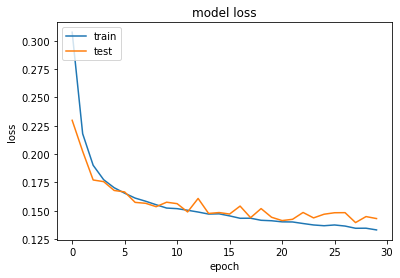

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

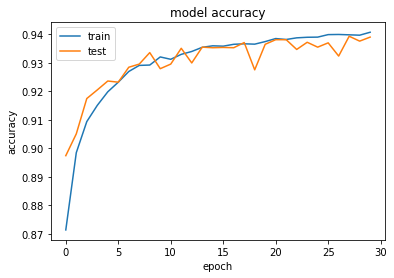

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CNN-Bi_LSTM_Attention-proposed method**

In [ ]:
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2,  return_sequences=True, recurrent_dropout=0.2))(x)
x = attention()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 embedding (Embedding)       (None, 60, 200)           4915800   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 60, 200)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_6 (Conv1D)           (None, 56, 64)            64064     
                                                                 
 bidirectional_6 (Bidirectio  (None, 56, 128)          66048     
 nal)                                                            
                                                                 
 attention_38 (attention)    (None, 128)               184

In [ ]:
from tensorflow.keras.callbacks import Callback
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(x_train, y_train, batch_size=128, epochs=100,
                    validation_data=(x_test, y_test))

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

Epoch 1/100
310/310 [==============================] - 151s 337ms/step - loss: 0.1170 - accuracy: 0.9477 - f1_m: 0.9681 - precision_m: 0.9791 - recall_m: 0.9577 - val_loss: 0.1302 - val_accuracy: 0.9456 - val_f1_m: 0.9666 - val_precision_m: 0.9813 - val_recall_m: 0.9527
Epoch 2/100
310/310 [==============================] - 117s 378ms/step - loss: 0.1154 - accuracy: 0.9475 - f1_m: 0.9679 - precision_m: 0.9800 - recall_m: 0.9564 - val_loss: 0.1384 - val_accuracy: 0.9403 - val_f1_m: 0.9636 - val_precision_m: 0.9749 - val_recall_m: 0.9529
Epoch 3/100
310/310 [==============================] - 121s 390ms/step - loss: 0.1148 - accuracy: 0.9476 - f1_m: 0.9681 - precision_m: 0.9800 - recall_m: 0.9567 - val_loss: 0.1323 - val_accuracy: 0.9446 - val_f1_m: 0.9660 - val_precision_m: 0.9787 - val_recall_m: 0.9541
Epoch 4/100
310/310 [==============================] - 127s 411ms/step - loss: 0.1134 - accuracy: 0.9487 - f1_m: 0.9686 - precision_m: 0.9810 - recall_m: 0.9569 - val_loss: 0.1355 - val_a

310/310 [==============================] - 113s 363ms/step - loss: 0.0920 - accuracy: 0.9581 - f1_m: 0.9746 - precision_m: 0.9805 - recall_m: 0.9691 - val_loss: 0.1213 - val_accuracy: 0.9535 - val_f1_m: 0.9718 - val_precision_m: 0.9780 - val_recall_m: 0.9660
Epoch 32/100
310/310 [==============================] - 112s 361ms/step - loss: 0.0889 - accuracy: 0.9613 - f1_m: 0.9765 - precision_m: 0.9826 - recall_m: 0.9707 - val_loss: 0.1244 - val_accuracy: 0.9516 - val_f1_m: 0.9709 - val_precision_m: 0.9713 - val_recall_m: 0.9706
Epoch 33/100
310/310 [==============================] - 112s 360ms/step - loss: 0.0885 - accuracy: 0.9604 - f1_m: 0.9759 - precision_m: 0.9820 - recall_m: 0.9701 - val_loss: 0.1225 - val_accuracy: 0.9535 - val_f1_m: 0.9719 - val_precision_m: 0.9767 - val_recall_m: 0.9674
Epoch 34/100
310/310 [==============================] - 110s 356ms/step - loss: 0.0869 - accuracy: 0.9612 - f1_m: 0.9765 - precision_m: 0.9816 - recall_m: 0.9715 - val_loss: 0.1222 - val_accuracy: 

310/310 [==============================] - 110s 356ms/step - loss: 0.0704 - accuracy: 0.9704 - f1_m: 0.9821 - precision_m: 0.9852 - recall_m: 0.9791 - val_loss: 0.1127 - val_accuracy: 0.9600 - val_f1_m: 0.9760 - val_precision_m: 0.9720 - val_recall_m: 0.9802
Epoch 62/100
310/310 [==============================] - 111s 357ms/step - loss: 0.0707 - accuracy: 0.9690 - f1_m: 0.9812 - precision_m: 0.9841 - recall_m: 0.9786 - val_loss: 0.1071 - val_accuracy: 0.9640 - val_f1_m: 0.9781 - val_precision_m: 0.9861 - val_recall_m: 0.9705
Epoch 63/100
310/310 [==============================] - 111s 357ms/step - loss: 0.0706 - accuracy: 0.9707 - f1_m: 0.9823 - precision_m: 0.9854 - recall_m: 0.9794 - val_loss: 0.1057 - val_accuracy: 0.9639 - val_f1_m: 0.9782 - val_precision_m: 0.9814 - val_recall_m: 0.9752
Epoch 64/100
310/310 [==============================] - 111s 359ms/step - loss: 0.0713 - accuracy: 0.9689 - f1_m: 0.9811 - precision_m: 0.9839 - recall_m: 0.9786 - val_loss: 0.1128 - val_accuracy: 

Epoch 91/100
310/310 [==============================] - 110s 347ms/step - loss: 0.0570 - accuracy: 0.9764 - f1_m: 0.9858 - precision_m: 0.9873 - recall_m: 0.9844 - val_loss: 0.1071 - val_accuracy: 0.9690 - val_f1_m: 0.9814 - val_precision_m: 0.9821 - val_recall_m: 0.9809
Epoch 92/100
310/310 [==============================] - 113s 365ms/step - loss: 0.0581 - accuracy: 0.9761 - f1_m: 0.9856 - precision_m: 0.9875 - recall_m: 0.9838 - val_loss: 0.1086 - val_accuracy: 0.9665 - val_f1_m: 0.9798 - val_precision_m: 0.9748 - val_recall_m: 0.9851
Epoch 93/100
310/310 [==============================] - 108s 350ms/step - loss: 0.0555 - accuracy: 0.9771 - f1_m: 0.9862 - precision_m: 0.9880 - recall_m: 0.9845 - val_loss: 0.1108 - val_accuracy: 0.9661 - val_f1_m: 0.9798 - val_precision_m: 0.9749 - val_recall_m: 0.9848
Epoch 94/100
310/310 [==============================] - 110s 355ms/step - loss: 0.0551 - accuracy: 0.9779 - f1_m: 0.9866 - precision_m: 0.9881 - recall_m: 0.9853 - val_loss: 0.1041 - v

In [ ]:
model.save('CBLAttWV.h5')
np.save('historyCBLAttWV.npy',history.history)

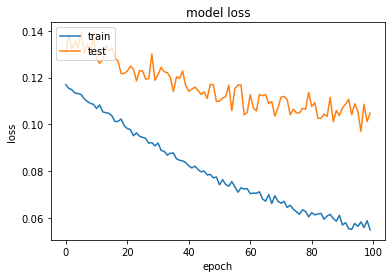

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

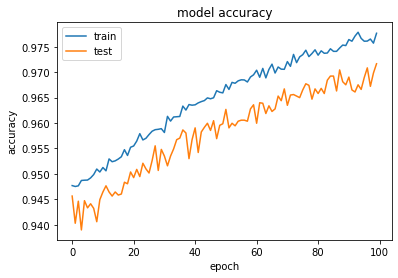

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()